## 12180626 성시열 산업정보화 002분반 중간고차 대체과제

- 파이썬으로 아래의 정렬 알고리즘들을을 구현하고, 10개부터 10만개 데이터를 랜덤으로 생성하여 알고리즘 수행 시간을 비교해보세요.

- [10, 100, 1000, 10000, 100000] 

1. 버블정렬
2. 선택정렬
3. 합병정렬
4. 퀵정렬

In [1]:
#그래프 x축에 해당하는 자료
test_range = []                          #리스트를 생성
for exponent in range(1, 6):             #exponent는 1부터 5까지 반복
    test_range.append(10 ** exponent)    #생성한 test_range에 10^1, 10^2, 10^3, 10^4, 10^5를 차례로 붙임
print(test_range)

[10, 100, 1000, 10000, 100000]


In [2]:
#임의의 값, 정렬되지 않은 값을 리스트에 생성하여 넣어주기
import random
alist = random.sample(range(0,100000),100000)   #1부터 10000000까지 범위의 수를 랜덤으로 추출하여 총 1000000를 alist에 넣어줌

In [3]:
len(alist)

100000

In [4]:
# 1 버블정렬
import time
def time_calculation1(test_range):
    result = []
    for i in test_range:
        start_time = time.time()
        copy_list = alist[:i]
        bubble_sort(copy_list)
        elapsed_time = time.time() - start_time
        result.append(elapsed_time)
    return result

In [5]:
def bubble_sort(arr):
 for i in range(len(arr)):
    for j in range(len(arr)-1):
      if arr[j]>arr[j+1]:
         temp = arr[j+1]
         arr[j+1]=arr[j]
         arr[j]=temp
      else:
       pass
 return arr

In [6]:
output_bubble = time_calculation1(test_range)

In [7]:
output_bubble

[3.552436828613281e-05,
 0.008541584014892578,
 0.504798173904419,
 21.01521611213684,
 1762.1225230693817]

In [8]:
#2 선택정렬
def time_calculation2(test_range):
    result = []
    for i in test_range:
        start_time = time.time()
        copy_list = alist[:i]
        selection_sort(copy_list)
        elapsed_time = time.time() - start_time
        result.append(elapsed_time)
    return result

In [9]:
def find_smallest(arr):
    smallest = arr[0] 
    smallest_index = 0 
    for i in range(1,len(arr)):
        if arr[i] < smallest:
            smallest = arr[i]
            smallest_index = i
    return smallest_index

In [10]:
def selection_sort(arr): 
    newArr = []
    for i in range(len(arr)):
        smallest = find_smallest(arr)  
        newArr.append(arr.pop(smallest))
    return newArr

In [11]:
output_selection = time_calculation2(test_range)

In [12]:
output_selection

[2.8133392333984375e-05,
 0.0009121894836425781,
 0.03536868095397949,
 3.7280654907226562,
 456.4719979763031]

In [13]:
#3 합병정렬
import time

def time_calculation3(test_range):
    result = []
    for i in test_range:
        start_time = time.time()
        copy_list = alist[:i]
        merge_sort(copy_list)
        elapsed_time = time.time() - start_time
        result.append(elapsed_time)
    return result

In [14]:
def merge_sort(list):
    if len(list) <= 1:
        return list

    mid = len(list) // 2
    leftList = list[:mid]
    rightList = list[mid:]
    
    leftList = merge_sort(leftList)
    rightList = merge_sort(rightList)
    return merge(leftList, rightList)

In [15]:
def merge(left, right):
    result = []
    while len(left) > 0 or len(right) > 0:
        if len(left) > 0 and len(right) > 0:
            if left[0] <= right[0]:
                result.append(left[0])
                left = left[1:]
            else:
                result.append(right[0])
                right = right[1:]
        elif len(left) > 0:
            result.append(left[0])
            left = left[1:]
        elif len(right) > 0:
            result.append(right[0])
            right = right[1:]
    return result

In [16]:
output_merge = time_calculation3(test_range)

In [17]:
output_merge

[6.151199340820312e-05,
 0.0012385845184326172,
 0.010023355484008789,
 0.36121201515197754,
 39.017786741256714]

In [18]:
# 4 퀵정렬
def time_calculation4(test_range):
    result = []
    for i in test_range:
        start_time = time.time()
        copy_list = alist[:i]
        quicksort(copy_list)
        elapsed_time = time.time() - start_time
        result.append(elapsed_time)
    return result

In [19]:
def quicksort(array):
    if len(array) < 2:
        return array        
    
    else: 
        pivot = array[0]     
        
        less = []
        greater = [] 
        for i in array[1:]:    
            if i <= pivot:      
                less.append(i)
            else:               
                greater.append(i)
                
        return quicksort(less) + [pivot] + quicksort(greater)

In [20]:
output_quick = time_calculation4(test_range)

In [21]:
output_quick

[2.4557113647460938e-05,
 0.00026416778564453125,
 0.004910707473754883,
 0.03719735145568848,
 0.3243069648742676]

시각화

In [22]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [23]:
#data
df=pd.DataFrame({'x': test_range, 'bubbleSort': output_bubble, 'selectionSort': output_selection, 'mergeSort': output_merge, 'quickSort': output_quick})

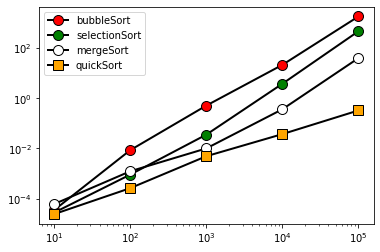

In [24]:
# 4가지 정렬시간 비교 그래프
plt.xscale('log')
plt.yscale('log')

plt.plot( 'x', 'bubbleSort', data=df, marker="o", markerfacecolor='red', markersize=10, color='black', linewidth=2)
plt.plot( 'x', 'selectionSort', data=df, marker='o', markerfacecolor='green', markersize=10, color='black', linewidth=2)
plt.plot( 'x', 'mergeSort', data=df, marker="o", markerfacecolor='white', markersize=10, color='black', linewidth=2)
plt.plot( 'x', 'quickSort', data=df, marker="s", markerfacecolor='orange', markersize=10, color='black', linewidth=2)

plt.legend()